In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Load the data
d = "training_data/data"
data_arrays = []
for file_name in os.listdir(d):
    with open(os.path.join(d, file_name), "rb") as f:
        data_arrays.append(np.frombuffer(f.read(), dtype=np.uint8))

In [3]:
# Split the data
all_games = []
for d in tqdm(data_arrays):
    all_games.extend(arr if i == 0 else arr[1:] for i, arr in enumerate(np.split(d, np.where(d == 255)[0])) if len(arr) > 1)

100%|█████████████████████████████████████████████████████████████████████████████████| 64/64 [00:00<00:00, 337.21it/s]


In [4]:
len(all_games)

84000

Text(0, 0.5, 'Number of games')

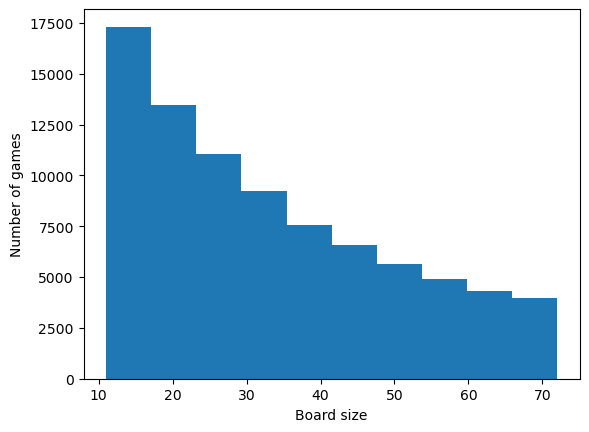

In [5]:
# See how the board size distribution is looking
plt.hist([len(g)/3 for g in all_games])
plt.xlabel("Board size")
plt.ylabel("Number of games")

In [6]:
# These should be integers (and hopefully the min/max of the board generation range)
min(len(g)/3 for g in all_games), max(len(g)/3 for g in all_games)

(11.0, 72.0)

In [7]:
def board_to_string(b: np.ndarray):
    """Converts a `b`oard numpy array to a string representation"""
    min_row = b[::3].min()
    max_row = b[::3].max()
    min_col = b[1::3].min()
    max_col = b[1::3].max()
    arr = [[' ' for _ in range(min_col, max_col+1)] for _ in range(min_row, max_row+1)]
    for i in range(0, len(b), 3):
        arr[b[i]-min_row][b[i+1]-min_col] = chr(b[i+2]+65)
    return "\n".join("".join(a) for a in arr)

In [8]:
print(board_to_string(all_games[1234]))

          J     
   CANCELLATIONS
   U      W     
   T            
   T            
MUTE            
   R            
